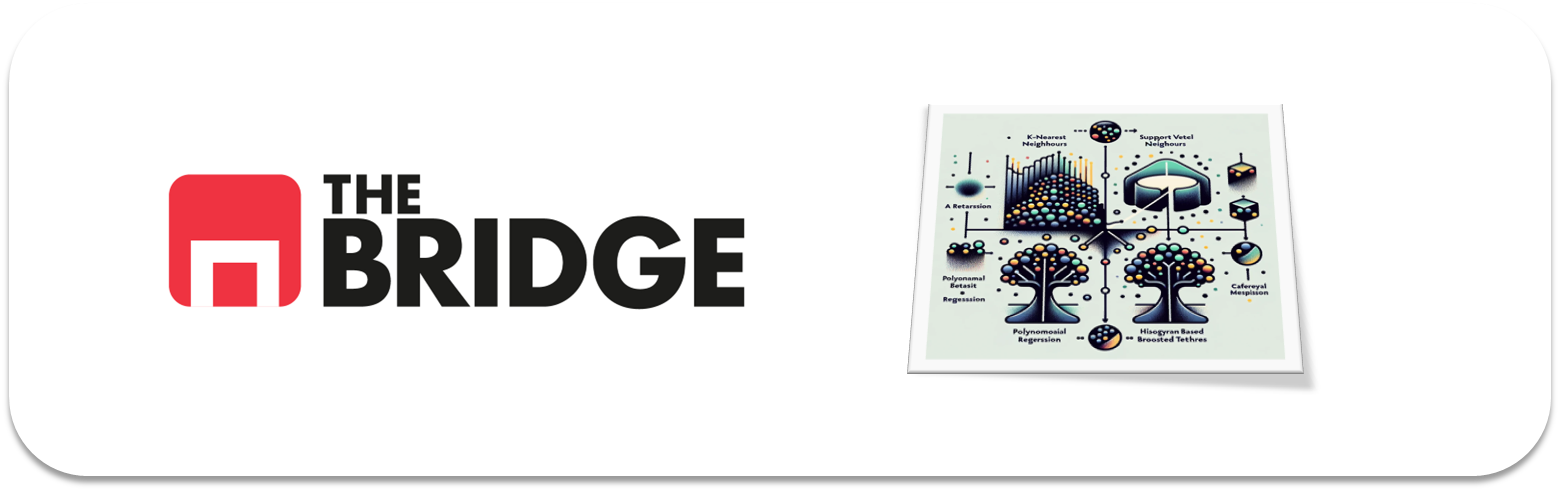

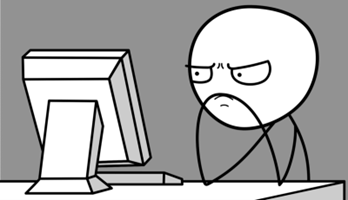

Para ejercitarte y afianzar lo aprendido sobre **Etapas Adicionales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [52]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error,mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict



import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



0.13.0


### #1 Equilibrado de Datasets

### Ejercicio 1

Carga el dataset de los diamantes (está en el directorio "data") preparado ya para poder entrenar un modelo de clasificación. Muestra las primeras 7 filas y observa el listado de columnas. Muestra la distribución del potencial target ("cut") que ya conoces. ¿Está desbalanceada?

In [53]:
df = pd.read_csv("./data/diamonds_preparado.csv", sep= "|")

In [54]:
df.head(7)

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0.24,Very Good,62.8,57.0,336,3.94,3.96,2.48,0,0,...,0,1,0,0,1,0,0,0,0,0
6,0.24,Very Good,62.3,57.0,336,3.95,3.98,2.47,0,0,...,1,0,0,1,0,0,0,0,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  object 
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   x             53940 non-null  float64
 6   y             53940 non-null  float64
 7   z             53940 non-null  float64
 8   color_D       53940 non-null  int64  
 9   color_E       53940 non-null  int64  
 10  color_F       53940 non-null  int64  
 11  color_G       53940 non-null  int64  
 12  color_H       53940 non-null  int64  
 13  color_I       53940 non-null  int64  
 14  color_J       53940 non-null  int64  
 15  clarity_IF    53940 non-null  int64  
 16  clarity_VVS1  53940 non-null  int64  
 17  clarity_VVS2  53940 non-null  int64  
 18  clarity_VS1   53940 non-nu

<Axes: >

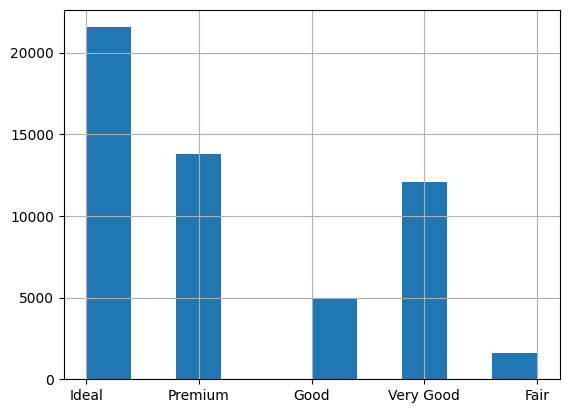

In [56]:
df.cut.hist()

 ### Ejercicio 2

 Crea un train_set y un test_set al 20%, crea los pares X,y de train y test con el target en la variable "cut", considera el resto como features.

In [57]:
target_clasificacion = "cut"

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)



In [58]:
lista = df.columns
lista

Index(['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_VVS1', 'clarity_VVS2', 'clarity_VS1',
       'clarity_VS2', 'clarity_SI1', 'clarity_SI2', 'clarity_I1'],
      dtype='object')

In [59]:
features_cat = ['color_D','color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J','clarity_IF', 'clarity_VVS1', 'clarity_VVS2', 'clarity_VS1','clarity_VS2', 'clarity_SI1', 'clarity_SI2', 'clarity_I1']

In [60]:
len(train_set)==len(test_set)

False

In [61]:


# Obtener los nombres de las columnas de ambos conjuntos de datos
train_columns = train_set.columns
test_columns = test_set.columns

# Comparar los nombres de las columnas
if train_columns.equals(test_columns):
    print("Las columnas de train_set y test_set son las mismas.")
else:
    print("Las columnas de train_set y test_set son diferentes.")
    print("Columnas en train_set pero no en test_set:", set(train_columns) - set(test_columns))
    print("Columnas en test_set pero no en train_set:", set(test_columns) - set(train_columns))


Las columnas de train_set y test_set son las mismas.


In [62]:
mapeo_cut = {
    "Fair":1,
    "Good":2,
    "Very Good":3,
    "Premium":4,
    "Ideal":5
}
train_set[target_clasificacion] = train_set[target_clasificacion].map(mapeo_cut)
test_set[target_clasificacion] = test_set[target_clasificacion].map(mapeo_cut)


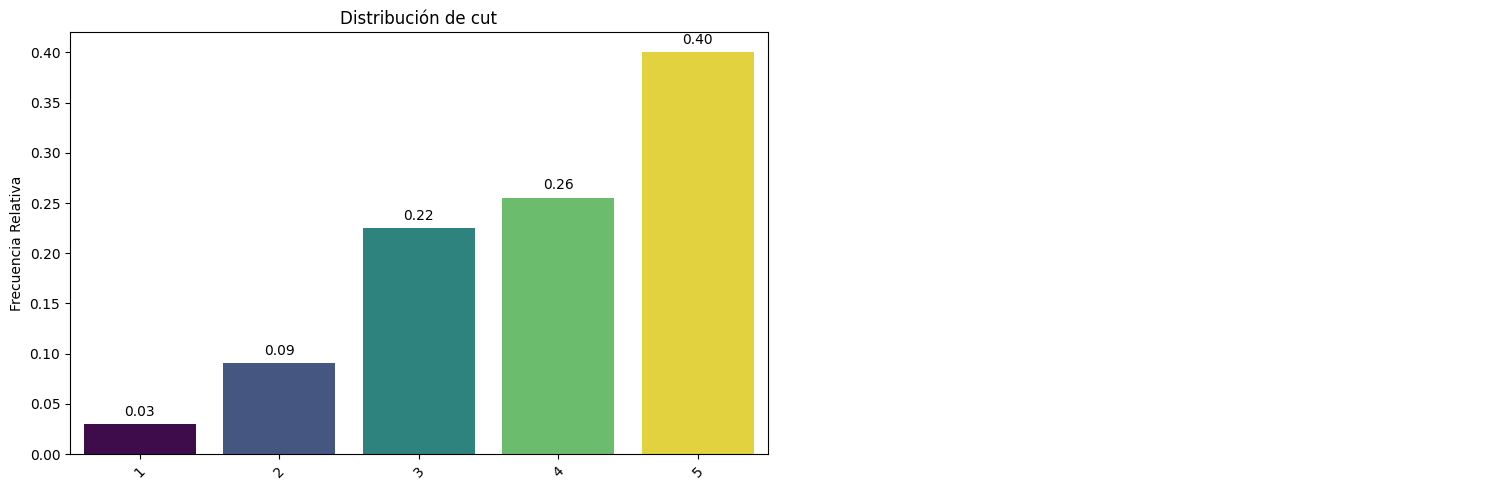

In [63]:
bt.pinta_distribucion_categoricas(train_set, [target_clasificacion], mostrar_valores=True, relativa=True)

In [64]:
features_num = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
features_num

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [65]:
scaler_cat = StandardScaler()
train_set[features_num] = scaler_cat.fit_transform(train_set[features_num])
test_set[features_num] = scaler_cat.transform(test_set[features_num])

### Ejercicio 3

Instancia un modelo RandomForest con max_depth a 5 y sin tocar otro hiperparámetro, entrénalo con el X_train y el y_train. Y muestra el classification_report para el X_train.

In [66]:
X_train_clf= train_set.drop(target_clasificacion, axis=1)
y_train_clf = train_set[target_clasificacion]
X_test_clf= test_set.drop(target_clasificacion, axis=1)
y_test_clf = test_set[target_clasificacion]

In [67]:
tree_clf = DecisionTreeClassifier(max_depth=5,
                                  random_state=42)
tree_clf.fit(X_train_clf, y_train_clf)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [68]:
y_pred_train = tree_clf.predict(X_train_clf)

report = classification_report(y_train_clf, y_pred_train)
print(report)


              precision    recall  f1-score   support

           1       0.88      0.87      0.88      1275
           2       0.81      0.60      0.68      3902
           3       0.72      0.26      0.38      9700
           4       0.63      0.87      0.73     11016
           5       0.80      0.94      0.86     17259

    accuracy                           0.73     43152
   macro avg       0.77      0.71      0.71     43152
weighted avg       0.74      0.73      0.70     43152



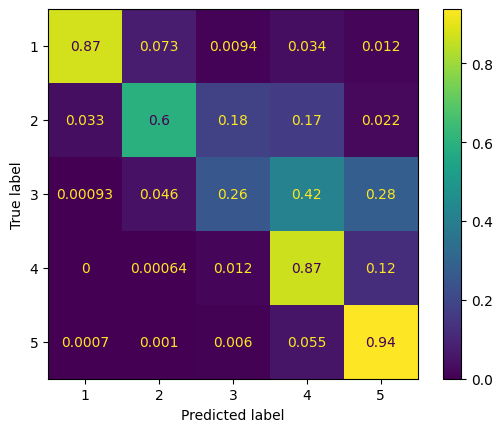

In [69]:
ConfusionMatrixDisplay.from_predictions(y_train_clf, y_pred_train, normalize="true")

### Ejercicio 4

Dado el desbalanceo, nos queremos fijar en el recall medio (la media del recall considerando cada clase). Usando "cross_val_score", hagamos una estimación un poco más precisa (y en general pesimista) de cual sería ese recall medio del modelo en general. Asigna para ello a `scoring` el valor `balanced_accuracy`

In [70]:
# Realizar la validación cruzada y calcular la precisión balanceada
scores = cross_val_score(tree_clf, X_train_clf, y_train_clf, cv=5, scoring='balanced_accuracy')

# Calcular la media del recall balanceado
mean_balanced_accuracy = scores.mean()
print("Scores en cada pliegue de validación cruzada:", scores)
print("Recall medio balanceado del modelo:", mean_balanced_accuracy)

Scores en cada pliegue de validación cruzada: [0.71324271 0.69252683 0.70562658 0.69744647 0.69936117]
Recall medio balanceado del modelo: 0.701640750207124


In [71]:
# Realizar la validación cruzada y obtener las predicciones
y_pred = cross_val_predict(tree_clf, X_train_clf, y_train_clf, cv=5)

# Generar el informe de clasificación
report = classification_report(y_train_clf, y_pred_train)

print("Informe de clasificación:")
print(report)

Informe de clasificación:
              precision    recall  f1-score   support

           1       0.88      0.87      0.88      1275
           2       0.81      0.60      0.68      3902
           3       0.72      0.26      0.38      9700
           4       0.63      0.87      0.73     11016
           5       0.80      0.94      0.86     17259

    accuracy                           0.73     43152
   macro avg       0.77      0.71      0.71     43152
weighted avg       0.74      0.73      0.70     43152



### Ejercicio 5

El resultado obtenido en el ejercicio 4 es bueno o malo dependiendo de lo que "Negocio" nos diga. Supón que negocio nos dice que quiere como mínimo que cada clase tenga un 50% de recall (que al menos un 50% de cada clase de diamente se etiquete bien por el modelo). Viendo el report anterior seguro que ves que así no llegamos. Tenemos que hacer algo, ayudar al modelo a conseguir ese objetivo. ¿Cómo? Con las téncias de equilibrado. Empecemos por aumentar las clases minoritarias con SMOTE. 

Crea un X_train y un y_train balanceados aplicando SMOTE; muestra el reparto del y_train para ver que se ha balanceado en todas las clases

In [72]:
smote = SMOTE(random_state=42)
X_train_clf_smote, y_train_clf_smote = smote.fit_resample(X_train_clf, y_train_clf)

In [73]:
y_train_clf_smote.value_counts(True)

cut
2    0.2
3    0.2
4    0.2
5    0.2
1    0.2
Name: proportion, dtype: float64

### Ejercicio 6

Entrena con el nuevo X,y y muestra los resultados del modelo así entrenado pero prediciendo contra el X_test creado en el ejercicio 2. Comenta el resultado. NOTA: En el caso de querer balancear con tecnicas de Oversampling y Undersampling, es interesante crear un set de validación adicional al de test y train, para no tener que usar el test como validación de los modelos.

In [74]:
modelo_smote = DecisionTreeClassifier(max_depth=5,
                                  random_state=42)
modelo_smote.fit(X_train_clf_smote, y_train_clf_smote)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [75]:
y_pred_train_smote = modelo_smote.predict(X_test_clf)

report = classification_report(y_test_clf, y_pred_train_smote)
print(report)


              precision    recall  f1-score   support

           1       0.90      0.87      0.89       335
           2       0.49      0.79      0.60      1004
           3       0.55      0.23      0.33      2382
           4       0.65      0.76      0.70      2775
           5       0.83      0.89      0.86      4292

    accuracy                           0.70     10788
   macro avg       0.69      0.71      0.68     10788
weighted avg       0.69      0.70      0.68     10788



### Ejercicio 7

Prueba ahora a mejorar el modelo empleando el hiperparámetro class_weight. Reinstancia el modelo, entrenalo contra el X_train inicial y luego muestra el report contra el test. Comenta brevemente el resultado.

In [76]:
modelo_cw = DecisionTreeClassifier(max_depth=5,
                                   class_weight="balanced",
                                   random_state=42)
modelo_cw.fit(X_train_clf, y_train_clf)
y_pred_test_cw = modelo_cw.predict(X_test_clf)

In [77]:
print(classification_report(y_test_clf, y_pred_test_cw))

              precision    recall  f1-score   support

           1       0.90      0.87      0.89       335
           2       0.45      0.86      0.59      1004
           3       0.50      0.15      0.23      2382
           4       0.65      0.76      0.70      2775
           5       0.83      0.89      0.86      4292

    accuracy                           0.69     10788
   macro avg       0.67      0.71      0.65     10788
weighted avg       0.68      0.69      0.66     10788



Precision (Precisión): Es la proporción de predicciones correctas para una clase en particular. Una precisión del 0.90 para la clase 1 significa que el 90% de las veces que el modelo predijo la clase 1, era correcta.

Recall (Sensibilidad o Cobertura): Es la proporción de verdaderos positivos que fueron correctamente identificados. Un recall de 0.87 para la clase 1 significa que el 87% de los casos que realmente pertenecían a la clase 1 fueron correctamente identificados por el modelo.

F1-Score: Es la media armónica de la precisión y la sensibilidad. Un F1-Score de 0.89 para la clase 1 indica un buen equilibrio entre precisión y sensibilidad.

Support (Apoyo): Número de ocurrencias reales de la clase en el dataset. Por ejemplo, hay 335 instancias de la clase 1 en el conjunto de datos.

Interpretación general:

La clase 1 tiene valores altos de precisión (0.90), recall (0.87) y F1-score (0.89), lo que indica un rendimiento muy bueno.

La clase 2 tiene baja precisión (0.45) pero alto recall (0.86), lo que sugiere que el modelo identifica la mayoría de las instancias de la clase 2, pero también comete muchos errores al hacerlo.

La clase 3 tiene tanto precisión (0.50) como recall (0.15) bajos, resultando en un F1-score bajo (0.23), lo que indica que el modelo tiene dificultades con esta clase.

La clase 4 tiene valores intermedios con una precisión de 0.65 y recall de 0.76, lo que resulta en un F1-score de 0.70.

La clase 5 tiene buenos valores de precisión (0.83), recall (0.89) y F1-score (0.86).

Promedios:

Accuracy (Exactitud): 0.69 significa que el modelo clasifica correctamente el 69% de las instancias en el conjunto de datos.

Macro avg: Proporción media de precisión, recall y F1-score calculados individualmente para cada clase.

Weighted avg: Promedio ponderado de precisión, recall y F1-score, donde cada clase contribuye según su proporción en el conjunto de datos.

En resumen, aunque el modelo tiene un buen rendimiento en algunas clases (como la clase 1 y la 5), tiene problemas con la clase 3. La exactitud general del modelo es del 69%.



### Ejercicio 8

Para terminar con nuestros intentos de mejorar la clasificación "global", vamos a aplicar el bajomuestreo de las clases mayoritarias, aunque no tengamos muchas esperanzas puestas en ello. Para poder hacerlo vamos a usar la clase `RandomUnderSampler` de la biblioteca imblearn. Investiga un poco sobre su funcionamiento (pista es equivalente en su uso a la clase Smote) y crea un dataset con undersampling de forma que las clases estén equilibradas. Muestra las frecuencias del target. ¿Por qué no tenemos muchas expectativas, en este caso, sobre esta técnica? 

In [85]:
rus = RandomUnderSampler(random_state=42)
X_train_clf_rus, y_train_clf_rus = rus.fit_resample(X_train_clf, y_train_clf)


In [81]:
y_train_clf_rus.value_counts(True)

cut
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
Name: proportion, dtype: float64

In [82]:
modelo_rus = DecisionTreeClassifier(max_depth=5,
                                  random_state=42)
modelo_rus.fit(X_train_clf_rus, y_train_clf_rus)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [83]:
y_pred_test_rus = modelo_rus.predict(X_test_clf)

report = classification_report(y_test_clf, y_pred_test_rus)
print(report)

              precision    recall  f1-score   support

           1       0.90      0.87      0.88       335
           2       0.49      0.75      0.59      1004
           3       0.55      0.26      0.35      2382
           4       0.65      0.75      0.70      2775
           5       0.83      0.88      0.86      4292

    accuracy                           0.70     10788
   macro avg       0.68      0.70      0.68     10788
weighted avg       0.69      0.70      0.68     10788



### Ejercicio 9

Entrena, ahora con class_weight a None, un RandomForest como el inicial pero contra el train creado en el ejercicio 8, muestra su informe de clasificación sobre la predicción contra test y comenta el resultado.

In [87]:
modelo_rus_2 = DecisionTreeClassifier(max_depth=5,
                                  class_weight=None,
                                  random_state=42)
modelo_rus_2.fit(X_train_clf_rus, y_train_clf_rus)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [88]:
y_pred_test_rus2 = modelo_rus_2.predict(X_test_clf)

report = classification_report(y_test_clf, y_pred_test_rus)
print(report)

              precision    recall  f1-score   support

           1       0.90      0.87      0.88       335
           2       0.49      0.75      0.59      1004
           3       0.55      0.26      0.35      2382
           4       0.65      0.75      0.70      2775
           5       0.83      0.88      0.86      4292

    accuracy                           0.70     10788
   macro avg       0.68      0.70      0.68     10788
weighted avg       0.69      0.70      0.68     10788



### #2 Análisis de Errores

### Ejercicio 10

Muestra la matriz de confusión con "ConfusionMatrixDisplay.from_predictions" para el clasificador entrenado con el hiperparámetro class_weight con el valor "balanced" (el del ejercicio 7). Asigna el valor "true" (ojo es un string, no el booleano True) al argumento normalize. Comenta que estamos viendo y hacia donde se dirigen los errores de clasificación de "Very Good"

En la clase 3 Very Good, acertamos 0.15 %  pero los fallos de esta clase se distribuyen entre 2 Good 0.27, 4 Premium 0.36 y 5 ideal 0.21

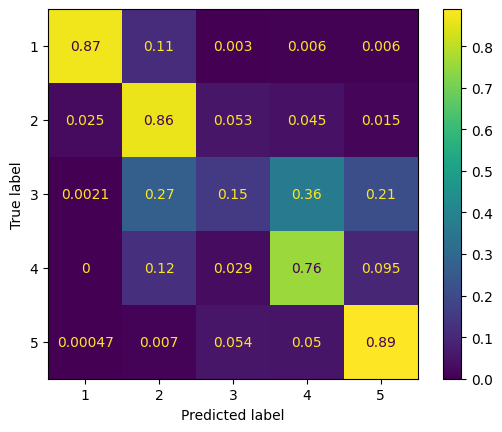

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred_test_cw, normalize="true");

### Ejercicio 11

Muestra ahora la matriz de confusión, empleando la misma función, pero esta vez enseñando los porcentajes de distribució de los errores en la predicción, para eso emplea normalize = "pred" como argumeto y date cuenta de que las columnas son las que ahora suman el 100%. Comenta el resultado respecto a "Premium" como predicción y a lo que se equivoca respecto a "Very Good". 

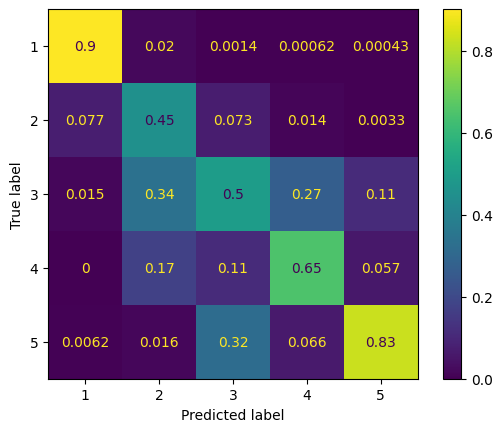

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred_test_cw, normalize="pred");

En 4 Premium, del 65% de las predicciones acertamos y el 27% de los fallos son 3 Very Good

### Ejercicio 12

Dada la relación entre los errores de "Very Good" y "Prediction"( supongo se refiere a Premium) que puedes haber observado en los ejercicios anteriores, una posible mejora es introducir un modelo que corrija esos errores, pero esa es la filosofía de los Gradient Boosted Trees. Provemos esa línea: Entrena un CatBoost con los hiperparámetros ajustados para que no emplee más de 5 niveles en sus árboles intermedios y para que balanceé las clases.

1. Obtener el "balanced_accuracy" primero con una validación cruzada.
2. Evaluálo después de contra el test.

In [92]:
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Supongamos que y_train_clf es tu variable de clases de entrenamiento
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_clf), y=y_train_clf)
class_weights_dict = dict(zip(np.unique(y_train_clf), class_weights))

# Crear el modelo CatBoost con los pesos de las clases ajustados
modelo_cb = CatBoostClassifier(depth=5, class_weights=class_weights_dict, random_seed=42, verbose=0)

# Entrenar el modelo
modelo_cb.fit(X_train_clf, y_train_clf, cat_features=features_cat)


In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

scores = cross_val_score(modelo_cb, X_train_clf, y_train_clf, cv=5, scoring='balanced_accuracy')
balanced_accuracy_cv = scores.mean()
print(f"Balanced accuracy (cross-validation): {balanced_accuracy_cv}")



Balanced accuracy (cross-validation): 0.7856322630208016


In [94]:
y_pred_test = modelo_cb.predict(X_test_clf)
balanced_accuracy_test = balanced_accuracy_score(y_test_clf, y_pred_test)
print(f"Balanced accuracy (test): {balanced_accuracy_test}")


Balanced accuracy (test): 0.7969466739305494
